#### Job Satisfaction

In this notebook, you will be exploring job satisfaction according to the survey results.  Use the cells at the top of the notebook to explore as necessary, and use your findings to solve the questions at the bottom of the notebook.

In [1]:
import pandas as pd
import numpy as np
import JobSatisfaction as t
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Calculating the mean and median of the Job Satisfaction (0-10 scale)

schema[schema['Column'] == 'JobSatisfaction']['Question']
job_satisfaction_mean = df['JobSatisfaction'].mean()
job_satisfaction_median = df['JobSatisfaction'].median()

print(job_satisfaction_mean)
print(job_satisfaction_median)

7.00072116961
7.0


In [3]:
# Finding the mean of job satisfaction by the level of formal education

satisfaction_by_education = df.groupby(['FormalEducation'])['JobSatisfaction'].mean()
satisfaction_by_education.sort_values(ascending=False)

FormalEducation
Doctoral degree                                                      7.438492
Secondary school                                                     7.219512
I prefer not to answer                                               7.211679
Some college/university study without earning a bachelor's degree    7.151268
Professional degree                                                  7.075893
I never completed any formal education                               7.000000
Master's degree                                                      6.977356
Primary/elementary school                                            6.946237
Bachelor's degree                                                    6.900293
Name: JobSatisfaction, dtype: float64

In [4]:
# Finding the mean of the job satisfaction by the level of Major Undergrad

satisfaction_by_undergrad = df.groupby(['MajorUndergrad'])['JobSatisfaction'].mean()
satisfaction_by_undergrad.sort_values(ascending=False)

MajorUndergrad
A health science                                                7.404255
Mathematics or statistics                                       7.192243
Psychology                                                      7.166667
A natural science                                               7.119205
A business discipline                                           7.081633
A non-computer-focused engineering discipline                   7.076923
I never declared a major                                        7.005291
Computer science or software engineering                        6.994426
Fine arts or performing arts                                    6.975369
Computer programming or Web development                         6.959750
Management information systems                                  6.920705
Computer engineering or electrical/electronics engineering      6.912682
A humanities discipline                                         6.911348
A social science                    

In [5]:
# Finding the mean of the job satisfaction by salary bins
# The higher the salary, the higher the job satisfaction. Well, makes sense!

salary_bins = np.linspace(df.Salary.min(), df.Salary.max(), 10)
df['BinnedSalary'] = pd.cut(df.Salary, salary_bins)

satisfaction_by_salary = df[['BinnedSalary', 'JobSatisfaction']].dropna(how='any',axis=0)
satisfaction_by_salary = satisfaction_by_salary.groupby(['BinnedSalary'])['JobSatisfaction'].mean().to_frame().reset_index()
 
# plt.hist(satisfaction_by_salary['BinnedSalary'], weights=satisfaction_by_salary['JobSatisfaction'])
satisfaction_by_salary

,BinnedSalary,JobSatisfaction
0,"(0.0, 21666.667]",6.696552
1,"(21666.667, 43333.333]",6.960803
2,"(43333.333, 65000.0]",6.983798
3,"(65000.0, 86666.667]",7.222222
4,"(86666.667, 108333.333]",7.100000
5,"(108333.333, 130000.0]",7.324675
6,"(130000.0, 151666.667]",7.540698
7,"(151666.667, 173333.333]",7.597403
8,"(173333.333, 195000.0]",7.619048


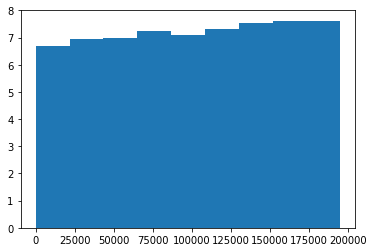

In [26]:
plt.hist(salary_bins[:-1], salary_bins, weights=satisfaction_by_salary['JobSatisfaction'])
plt.show()

In [28]:
print(satisfaction_by_salary['BinnedSalary'])

0            (0.0, 21666.667]
1      (21666.667, 43333.333]
2        (43333.333, 65000.0]
3        (65000.0, 86666.667]
4     (86666.667, 108333.333]
5      (108333.333, 130000.0]
6      (130000.0, 151666.667]
7    (151666.667, 173333.333]
8      (173333.333, 195000.0]
Name: BinnedSalary, dtype: category
Categories (9, interval[float64]): [(0.0, 21666.667] < (21666.667, 43333.333] < (43333.333, 65000.0] < (65000.0, 86666.667] ... (108333.333, 130000.0] < (130000.0, 151666.667] < (151666.667, 173333.333] < (173333.333, 195000.0]]


In [24]:
print(salary_bins[:-1])

print(salary_bins)

[      0.           21666.66666667   43333.33333333   65000.
   86666.66666667  108333.33333333  130000.          151666.66666667
  173333.33333333]
[      0.           21666.66666667   43333.33333333   65000.
   86666.66666667  108333.33333333  130000.          151666.66666667
  173333.33333333  195000.        ]


In [7]:
# Finding the mean of the job satisfaction by Employment Status

satisfaction_by_undergrad = df.groupby(['EmploymentStatus'])['JobSatisfaction'].mean()
satisfaction_by_undergrad.sort_values(ascending=False)

EmploymentStatus
Independent contractor, freelancer, or self-employed    7.231985
Employed full-time                                      6.980608
Employed part-time                                      6.846154
I prefer not to say                                          NaN
Not employed, and not looking for work                       NaN
Not employed, but looking for work                           NaN
Retired                                                      NaN
Name: JobSatisfaction, dtype: float64

In [8]:
# Finding the mean of the job satisfaction by Company Size

satisfaction_by_undergrad = df.groupby(['CompanySize'])['JobSatisfaction'].mean()
satisfaction_by_undergrad.sort_values(ascending=False)

CompanySize
I prefer not to answer      7.284946
I don't know                7.054622
10 to 19 employees          7.035739
500 to 999 employees        7.029967
100 to 499 employees        7.029324
Fewer than 10 employees     7.025719
20 to 99 employees          6.997039
1,000 to 4,999 employees    6.908506
5,000 to 9,999 employees    6.832155
10,000 or more employees    6.793617
Name: JobSatisfaction, dtype: float64

In [9]:
# Finding the mean of the job satisfaction by Programming as a hobby

satisfaction_by_undergrad = df.groupby(['ProgramHobby'])['JobSatisfaction'].mean()
satisfaction_by_undergrad.sort_values(ascending=False)

ProgramHobby
Yes, both                                    7.189316
Yes, I contribute to open source projects    7.158649
Yes, I program as a hobby                    6.927150
No                                           6.874806
Name: JobSatisfaction, dtype: float64

In [10]:
# Finding the mean of the job satisfaction by job flexibility (wfh arrangement)

satisfaction_by_undergrad = df.groupby(['HomeRemote'])['JobSatisfaction'].mean()
satisfaction_by_undergrad.sort_values(ascending=False)

HomeRemote
All or almost all the time (I'm full-time remote)          7.405421
Less than half the time, but at least one day each week    7.143786
About half the time                                        7.125737
A few days each month                                      7.096694
More than half, but not all, the time                      6.973684
It's complicated                                           6.942053
Never                                                      6.697127
Name: JobSatisfaction, dtype: float64

#### Question 1

**1.** Use the space above to assist in matching each variable (**a**, **b**, **c**, **d**, **e**, **f**, **g**, or **h** ) as the appropriate key that describes the value in the **job_sol_1** dictionary.

In [11]:
a = 0.734
b = 0.2014
c = 'full-time'
d = 'contractors'
e = 'retired'
f = 'yes'
g = 'no'
h = 'hard to tell'

job_sol_1 = {'The proportion of missing values in the Job Satisfaction column': b,
             'According to EmploymentStatus, which group has the highest average job satisfaction?': d, 
             'In general, do smaller companies appear to have employees with higher job satisfaction?': g}
             
t.jobsat_check1(job_sol_1)

Looking at the average job satisfaction for each group within CompanySize, and sorting using sort_values(), there is a bit of trend don't you think?  Maybe not significant, but still an intriguing trend!


#### Question 2

**2.** Use the space above to assist in matching each variable (**a**, **b**, **c** ) as the appropriate key that describes the value in the **job_sol_2** dictionary. Notice you can have the same letter appear more than once.

In [12]:
a = 'yes'
b = 'no'
c = 'hard to tell'

job_sol_2 = {'Do individuals who program outside of work appear to have higher JobSatisfaction?': a,
             'Does flexibility to work outside of the office appear to have an influence on JobSatisfaction?': a, 
             'A friend says a Doctoral degree increases the chance of having job you like, does this seem true?': a}
             
t.jobsat_check2(job_sol_2)

Nice job! That's what we found as well!
